#### 1. Loading the diabetes dataset

In [362]:
from sklearn.datasets import load_diabetes


In [363]:
diabetes = load_diabetes()

#### 2. - Splitting the dataset and using birthday as random state

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'],random_state=804)

In [365]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
lasso.score(X_train,y_train)

0.4003687245034687

In [366]:
lasso.score(X_test,y_test)

0.3008233239979874

In [367]:
dict1 = dict(zip(diabetes.feature_names, lasso.coef_))

In [368]:
np.sum(lasso.coef_ != 0)

3

In [369]:
dict1

{'age': 0.0,
 'sex': -0.0,
 'bmi': 345.88235732585105,
 'bp': 6.907798320739387,
 's1': 0.0,
 's2': 0.0,
 's3': -0.0,
 's4': 0.0,
 's5': 392.6422634537517,
 's6': 0.0}

#### 3. Count of features and their respective names and R^2

Clearly, the model uses 3 features for which coef_ != 0 which are as follows
1. bmi
2. bp
3. s5

As per the output of lasso.score, training R^2 is 0.4003687245034687 and test R^2 0.3008233239979874

#### 4. Loading the original diabetes.data 

In [370]:
import numpy as np
X = np.genfromtxt("diabetes.data",delimiter="\t",usecols=np.arange(10),skip_header=1)
y = np.genfromtxt("diabetes.data",delimiter="\t",usecols = 10, dtype=int,skip_header=1)

#### 5. Split the loaded diabetes.data file into training and test data

In [371]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=804)

In [372]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
lasso.score(X_train,y_train)

0.5571509380579014

In [373]:
lasso.score(X_test,y_test)

0.37472345499071036

In [374]:
np.sum(lasso.coef_ != 0)

9

In [375]:
dict1 = dict(zip(diabetes.feature_names, lasso.coef_))

In [376]:
dict1

{'age': -0.07486714460620997,
 'sex': -22.666947965349323,
 'bmi': 5.765243269120538,
 'bp': 1.1058436301855596,
 's1': -0.009282804489657931,
 's2': -0.140753531512414,
 's3': -0.9802279086132046,
 's4': 0.0,
 's5': 45.50994153896984,
 's6': 0.2944247835750084}

#### 6. Count of features ,their respective names and R^2

The model on the downloaded dataset uses 9 features which are following:
1. age
2. sex
3. bmi
4. bp
5. s1
6. s2
7. s3
8. s5
9. s6


The training R^2 in this case is 0.5571509380579014 and the test R^2 is 0.37472345499071036


As compared to Step 3, The model fit on the downloaded data file uses more features and hence the result of R^2 is more than the previous dataset

#### 7. Data preprocessing using Standard Scaler

In [377]:
from sklearn.preprocessing import StandardScaler

In [378]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [379]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [380]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_scaled,y_train)
lasso.score(X_train_scaled,y_train)

0.5588219147472661

In [381]:
lasso.score(X_test_scaled,y_test)

0.36468282783540706

In [382]:
np.sum(lasso.coef_ != 0)

7

In [383]:
dict1 = dict(zip(diabetes.feature_names, lasso.coef_))

In [384]:
dict1

{'age': -0.0,
 'sex': -11.976772021323512,
 'bmi': 24.631883761822703,
 'bp': 14.114512179752982,
 's1': -4.806100236045458,
 's2': -0.0,
 's3': -10.117660435650013,
 's4': 0.0,
 's5': 28.251847855781648,
 's6': 2.00714699530631}

#### 8. Count of features, respective names and R^2
After applying StandardScaler, the number of features used by the model are 7. The list is as follows:
1. sex
2. bmi
3. bp
4. s1
5. s3
6. s5
7. s6

The training R^2 is 0.5588219147472661 and the test R^2 is 0.36468282783540706


The current results are closer to the step 6, i.e for the original data because data used in item 3 is normalized and in case of item 6 we use only standard scaler to scale the data.
Also, we have already preprocessed the data and then applied prediction which comes out to be wrong series of events on the data

In [496]:
lasso1 = Lasso(alpha=1,max_iter=100000).fit(X_train_scaled,y_train)
r1 = lasso1.score(X_test_scaled,y_test)
lasso01 =Lasso(alpha=0.1,max_iter=100000).fit(X_train_scaled,y_train)
r01 = lasso01.score(X_test_scaled,y_test)
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train_scaled,y_train)
r001 = lasso001.score(X_test_scaled,y_test)
lasso0001 = Lasso(alpha=0.001,max_iter=100000).fit(X_train_scaled,y_train)
r0001 = lasso0001.score(X_test_scaled,y_test)
lasso10 = Lasso(alpha=10,max_iter=100000).fit(X_train_scaled,y_train)
r10 = lasso10.score(X_test_scaled,y_test)
lasso7 = Lasso(alpha=7,max_iter=100000).fit(X_train_scaled,y_train)
r7 = lasso7.score(X_test_scaled,y_test)

In [497]:

rs = [r0001,r001,r01,r1,r7,r10]


In [498]:
coefs=[np.sum(lasso0001.coef_!=0),np.sum(lasso001.coef_!=0),np.sum(lasso01.coef_!=0),np.sum(lasso1.coef_!=0),np.sum(lasso7.coef_!=0),np.sum(lasso10.coef_!=0)]

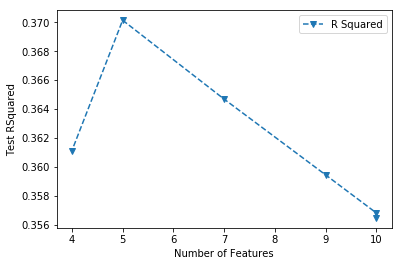

In [618]:
plt.plot(coefs,rs,"v--",label="R Squared")
plt.xlabel("Number of Features")
plt.ylabel("Test RSquared")
plt.legend()

#### 9. Graph
According to the graph, point (5,0.37) is the best point. This corresponds to Alpha = 0.1
This is also verfied in cross validation below

In [500]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)
grid_search.score(X_test_scaled, y_test)

0.359439290270696

In [501]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.1}
0.5173749358640259


In [502]:
lasso = Lasso(alpha=0.1).fit(X_train_scaled,y_train)

In [503]:
lasso.score(X_train_scaled,y_train)

0.5638164448343963

In [504]:
lasso.score(X_test_scaled,y_test)

0.359439290270696

In [505]:
np.sum(lasso.coef_!=0)

9

#### 10. Cross Validation 
Using 10 fold cross validation, the best alpha is 0.1

Selecting alpha = 0.1 for Lasso, following are the R^2

1. Training R^2 - 0.5638164448343963
2. Test R^2 - 0.359439290270696


Number of features used are 9

In [507]:
X_train_proper, X_calibration, y_train_proper, y_calibration = train_test_split(X_train,y_train,random_state=804,test_size=99)

In [513]:
scaler = StandardScaler()
scaler.fit(X_train_proper)
X_train_proper_scaled = scaler.transform(X_train_proper)
X_calibration_scaled = scaler.transform(X_calibration)
X_test_scaled = scaler.transform(X_test)

In [519]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_proper_scaled,y_train_proper)
yval = lasso.predict(X_test_scaled)
yhat = lasso.predict(X_calibration_scaled)

In [526]:
alpha = abs(np.subtract(y_calibration ,yhat))

In [528]:
alpha = sorted(alpha)

In [530]:
k05  = (1 - 0.05) *(99 +1)

In [539]:
k20=(1-0.2) *(99+1)

In [540]:
c05 = alpha[int(k05) - 1]

In [541]:
c05

106.23068983051851

In [542]:
c20 = alpha[int(k20)-1]

In [543]:
c20

64.30153289055269

In [546]:
length05 = c05 *2 

In [547]:
length05

212.46137966103703

In [548]:
length20 = c20*2

In [549]:
length20

128.60306578110539

1. LENGTH OF INTERVAL FOR 5% IS 212.46137966103703
2. LENGTH OF INTERVAL FOR 20% IS 128.60306578110539

In [559]:
yvalp_05 = yval + c05
yvaln_05 = yval - c05

In [595]:
yvalp_20 = yval + c20
yvaln_20 = yval - c20

In [605]:
res5 = []
for i in range(1,len(y_test)):
    if yvaln_05[i]<=y_test[i] and yvalp_05[i] >= y_test[i]:
        res5.append(True)
    else:
        res5.append(False)

In [606]:
1 - np.mean(res5)

0.08181818181818179

In [609]:
res20 = []
for j in range(1,len(y_test)):
    if yvaln_20[j]<=y_test[j] and yvalp_20[j] >= y_test[j]:
        res20.append(True)
    else:
        res20.append(False)

In [610]:
1 - np.mean(res20)

0.30000000000000004

1. TEST ERROR RATE FOR 5% IS 0.08181818181818179
2. TEST ERROR RATE FOR 20% IS 0.30000000000000004